导入模块

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
%matplotlib inline

汽车数据预处理 <br>
1、读取数据并且用NaN填充缺失值

汽车数据预处理
1、读取数据并且用NaN填充缺失值

In [2]:
data_path = os.path.join(os.getcwd(),'Datas','Auto-Data.csv')

csv文件内 “?” 数据代表缺失值，用NaN去替代 "na_values"参数的意思就是csv中哪一种字符代表缺失值

In [3]:
data = pd.read_csv(data_path,na_values='?')

查看一下读取的数据

In [4]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


查看一下行和列

In [5]:
data.shape

(205, 26)

现在通过 missgno模块看一下各个特征缺失值的情况

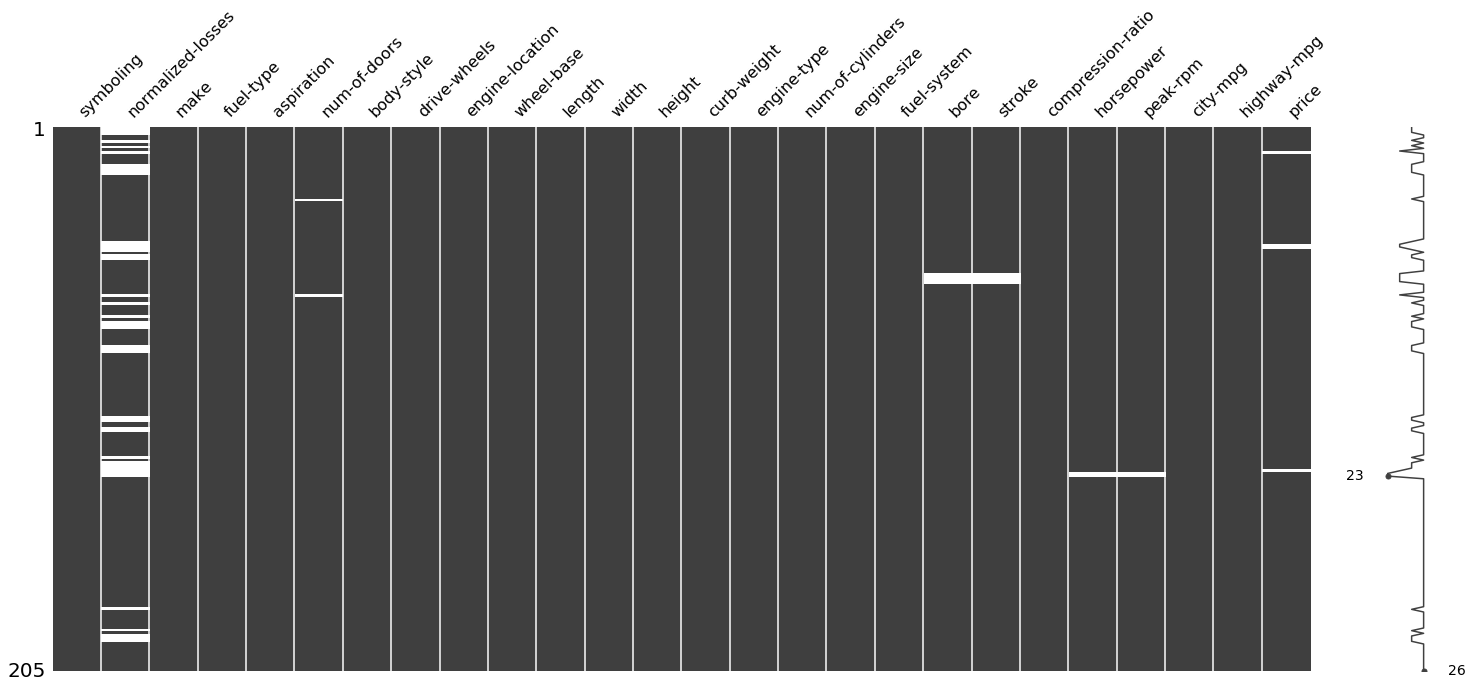

In [8]:
msno.matrix(data)

查看后可以发现'normalized-losses'是缺失大户，其他部分数据缺失的还是比较少的，在搞定normalized-losses之后直接删除其他的缺失行就好了


然后我们就来考虑缺失值比较多的这一列怎么做了<br>
我们填充缺失值的方法有几种<br>
1、直接删除，像上面就是这种，缺失值比较少直接删除这一行数据，也不影响<br>
2、直接用均值填充，这种需要先查看一下均值，看一下这行数据分布是否均匀，如果不是很均匀的就不能用均值填充了<br>
3、根据特定分类的方法去找均值来填充，这个是方法2的升级版，也比较难，因为如何确定用哪一个特征去分类对比<br>
我们已经否定了第一种方法，那就先来看第二种方法，我们提出这一行数据然后看一下分布,这里就要用到ECDF,这个库可以方便的做出分布图

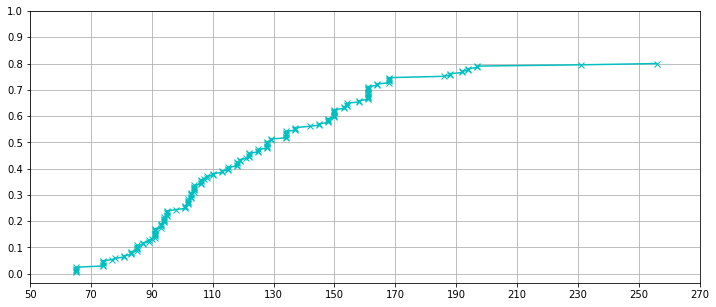

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

normalized_losses_data = data['normalized-losses'].copy()
cdf = ECDF(normalized_losses_data)
plt.figure(figsize=(12,5))
plt.plot(cdf.x,cdf.y,"cx-")
plt.grid()
plt.xticks(np.arange(50,280,20))
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

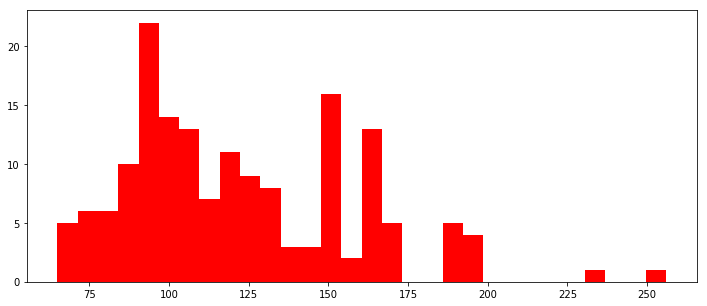

In [12]:
plt.figure(figsize=(12,5))
plt.hist(normalized_losses_data.dropna(),bins=30,color='r')
plt.show()

上面代码先是用CDEF函数把数据组合成概率分布的模式，然后通过matplotlib画出累积概率分布和概率分布，这里先看一下ECDF函数的作用

In [13]:
cdf.x[:10]

array([-inf,  65.,  65.,  65.,  65.,  65.,  74.,  74.,  74.,  74.])

In [14]:
cdf.y[:10]

array([0.        , 0.00487805, 0.0097561 , 0.01463415, 0.0195122 ,
       0.02439024, 0.02926829, 0.03414634, 0.03902439, 0.04390244])

ECDF函数把会把数据重新排列（从小到大），x和y分别是样本和累加概率<br>
比如：如果把上面一列数据看做一个随机变量X，$x_i = 65$的累加概率就是0.02439约等于2.4%

我们把cdf.x和cdf.y放到plot里就可以画出累积概率分布<br>因为X轴上$x_i$ = 64其实有5个数据点，最大的数据点是0.02439，也就代表$x_i=(0~65)$的概率约等于2.4%<br>
这个相对来说还是非常简单的

柱形图Hist其实就是一定范围内数据的个数，这个看起来就会很明显，我们先来看一下默认情况下的均值

In [15]:
normalized_losses_data.describe() #这是去除了NaN的，describe()函数是不包括NaN的

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

我们可以通过describe（）函数，直接算出均值，$\mu\approx122$,然后我们返回上面的累计分布折线图去看一下（第一张图）<br>
可以发现，<br>
1、122这个数据点在图表上小于均值  <br>
2、这个数据并不是均匀分布,大部分都集中在170以下，并且小于130的数据点非常密集<br>
这样的话直接用均值填充是会有点问题。所以我们考虑通过上面所说的第三种方式填充缺失数据<br>

接下来就要考虑用什么特征去重组normalized_losses这个数据集，我们要通过特定的分类，把normalized_losses拆分后重新计算各个分类的均值
这里是这样考虑的，我们最终是要去预测symboling（保险评级），那就先用这个试一下<br>
这里要提一下，如果模型需要计算的更稳定，更准确，缺失值就不能太多，或者说填补缺失值的时候，就不能用简单的均值去填充，就算是重新分类后的均值也是会有点问题，所以数据的完整性，是非常重要的

In [16]:
# 先进行分组，提取normalized-losses和symboling的数据
group_data = data.loc[:,['symboling','normalized-losses']]
group_data.head()

,symboling,normalized-losses
0,3,NaN
1,3,NaN
2,1,NaN
3,2,164.0
4,2,164.0


接下来以symboling为标准来分类

In [18]:
new_group_data = group_data.groupby('symboling')
new_group_data.describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="8" halign="left">normalized-losses</th>
    </tr>
    <tr>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>symboling</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>-2</th>
      <td>3.0</td>
      <td>103.000000</td>
      <td>0.000000</td>
      <td>103.0</td>
      <td>103.00</td>
      <td>103.0</td>
      <td>103.0</td>
      <td>103.0</td>
    </tr>
    <tr>
      <th>-1</th>
      <td>20.0</td>
      <td>85.600000</td>
      <td>18.528499</td>
      <td>65.0</td>
      <td>71.75</td>
      <td>91.5</td>
      <td>95.0</td>
      <td>137.0</td>
    </tr>
    <tr>
      <th>0</th>
      <td>48.0</td>
      <td>113.166667</td>
      <td>32.510773</td>
      <td>77.0</td>
      <td>91.00</td>
      <td>102.0</td>
      <td>120.5</td>
      <td>192.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>47.0</td>
      <td>128.574468</td>
      <td>28.478630</td>
      <td>74.0</td>
      <td>105.50</td>
      <td>125.0</td>
      <td>148.0</td>
      <td>231.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>29.0</td>
      <td>125.689655</td>
      <td>30.167513</td>
      <td>83.0</td>
      <td>94.00</td>
      <td>134.0</td>
      <td>137.0</td>
      <td>192.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>17.0</td>
      <td>168.647059</td>
      <td>30.636867</td>
      <td>142.0</td>
      <td>150.00</td>
      <td>150.0</td>
      <td>194.0</td>
      <td>256.0</td>
    </tr>
  </tbody>
</table>
</div>

这只是个分组，通过分组我们还是来画个图看一下吧

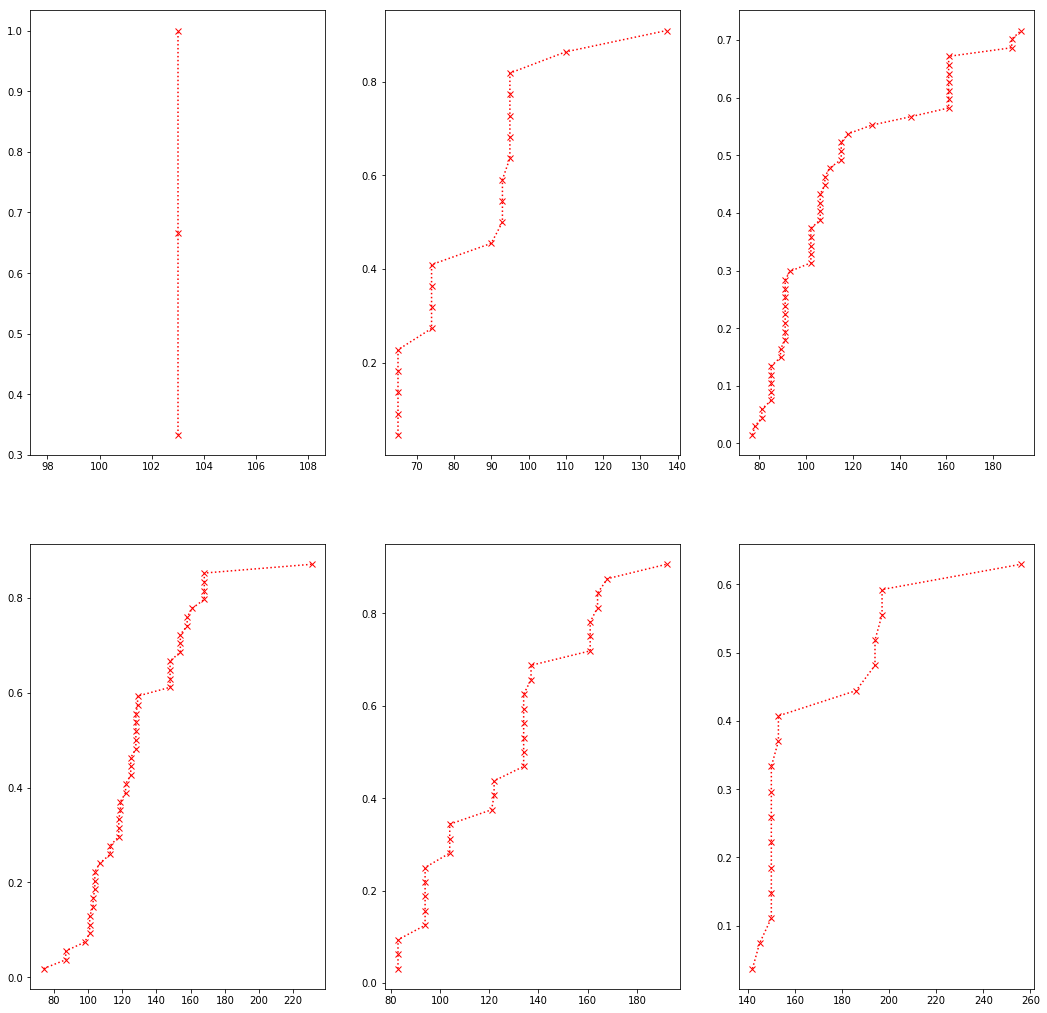

In [20]:
plt.figure(figsize=(18, 18))
i = 1
for index, value in new_group_data:
    plt.subplot(2, 3, i)
    i += 1
    split_cdf = ECDF(value['normalized-losses'])
    plt.plot(split_cdf.x, split_cdf.y, 'r:x')


再看下概率分布

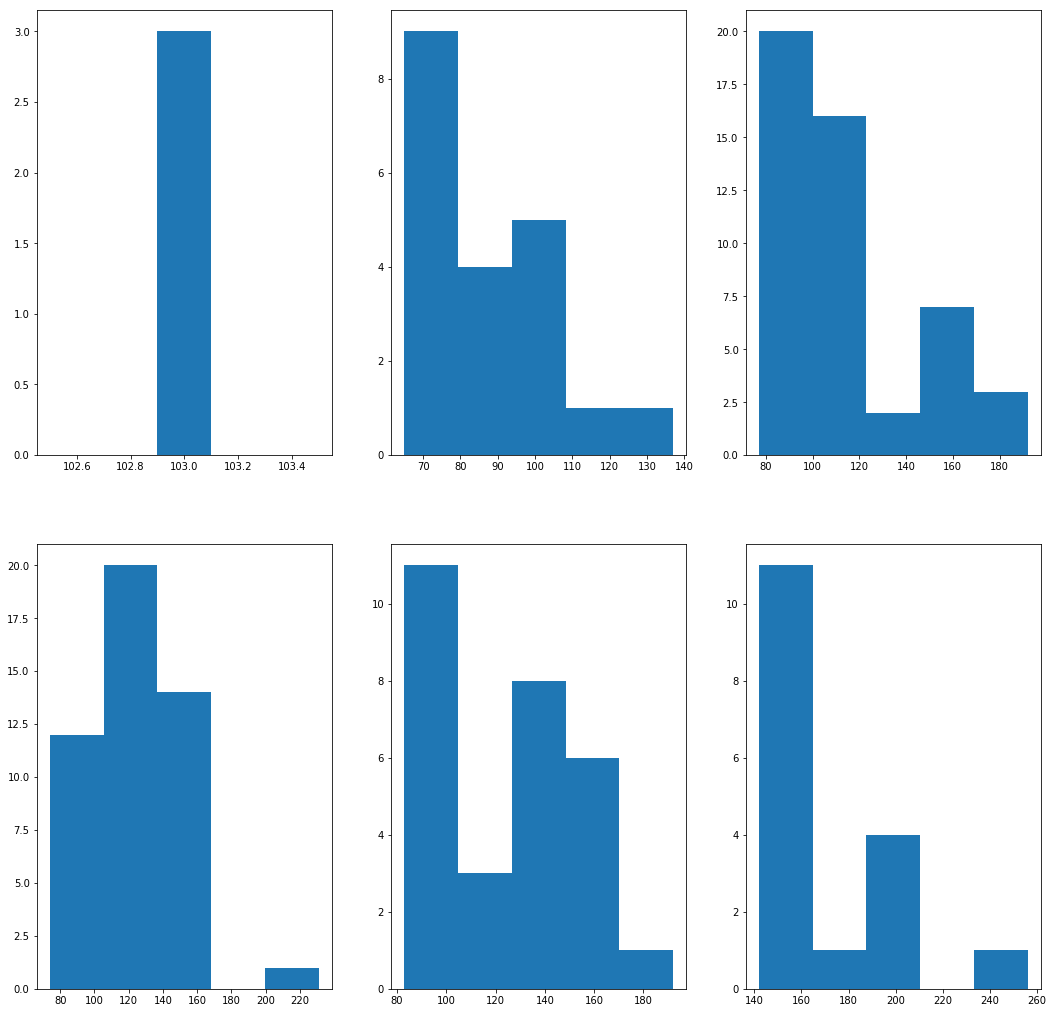

In [22]:
plt.figure(figsize=(18,18))
i = 1
for index, value in new_group_data:
    plt.subplot(2, 3, i)
    i += 1
    plt.hist(value['normalized-losses'].dropna(),bins=5)

看了这个图，瞬间就发现，其实分布也不太均匀，再看下各个分组的均值

In [23]:
new_group_data.mean()

,normalized-losses
symboling,
-2,103.000000
-1,85.600000
0,113.166667
1,128.574468
2,125.689655
3,168.647059


到这里已经可以发现，均值填充不管分类不分类 其实准确性都不太好，所以数据完整度是很重要的，如果缺失值的量非常大，又不能去掉这个特征，那就考虑先把这一特征作为预测值，这里我就先用分类的均值填充了

In [24]:
fill_data = new_group_data['normalized-losses'].transform(lambda x:x.fillna(x.mean()))
print('shape of data:{0}'.format(fill_data.shape))
fill_data.head(10)

shape of data:(205,)


0    168.647059
1    168.647059
2    128.574468
3    164.000000
4    164.000000
5    125.689655
6    158.000000
7    128.574468
8    158.000000
9    113.166667
Name: normalized-losses, dtype: float64

new_group_data是一个已近分完组的可迭代对象，通过transform分别迭代分组后的每一组数据 x ，然后通过fillna去填充NaN的值，最后把这组数据填充回data

In [25]:
data['normalized-losses'] = fill_data
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,168.647059,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,168.647059,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.574468,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,125.689655,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,128.574468,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,113.166667,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


接下来就是删掉那些少量的缺失数据<br>
先取出需要删除行的特征列，我这里直接去掉了normalized-losses这一列名，其他全部保留，dataframe的.columns方法返回的是一个index类型，先把他转成list方便处理

['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


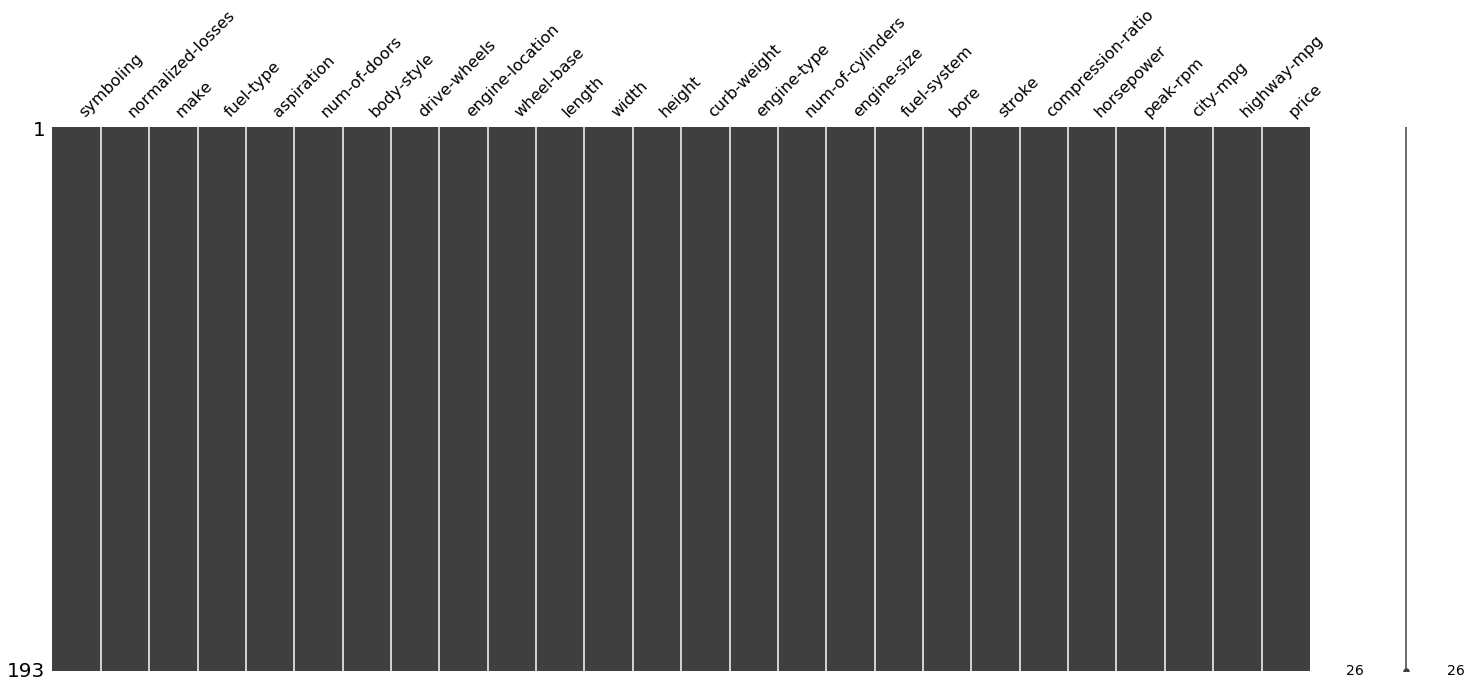

In [26]:
na_columns = data.columns.tolist()
na_columns.remove('normalized-losses')
print(na_columns)
data = data.dropna(axis=0,how='any',subset=na_columns).copy()
msno.matrix(data)